In [1]:
# path managing
import os

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Data Exploration

In [2]:
def data_reload():
    train_df = pd.read_csv(os.path.join("Data","train.csv"))
    test_df =  pd.read_csv(os.path.join("Data","test.csv"))
    return train_df, test_df

train_df, test_df = data_reload()

In [3]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
col = train_df.columns.values
col

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now let's check what kind of data is actually missing

In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)                 #counting the total of data missing
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100            #getting the percentage of values at each column is missing

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)               #Formatting percent_1 to match total

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


Then, we can analyze possible co-relations between the features

In [8]:
col = train_df.columns.values
col

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## 1. Age and Sex:

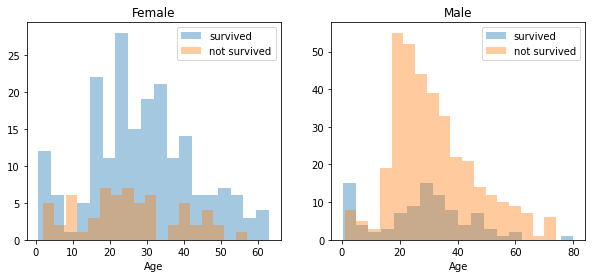

In [9]:
# Creating a histographic between the Two Sex and the Ages
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Legends
survived = 'survived'
not_survived = 'not survived'

# Setting the plots
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4)) 

# Women x Age graph
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

# Men x Age graph
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

## 2. Pclass

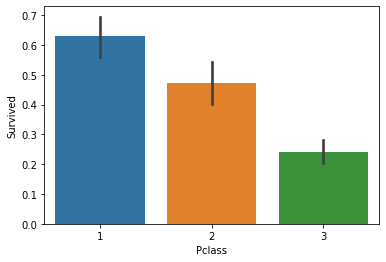

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

We can see Pclass is contributing to a persons chance of survival, especially if this person is in class 1

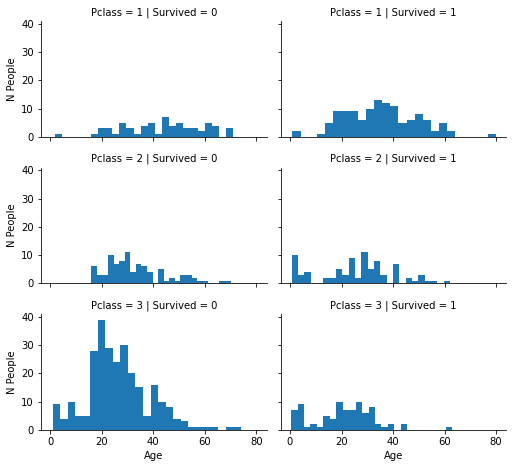

In [11]:
# Generating a Facegrid of all the combinations between Pclass and Survived
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)

# Plotting an conditional histogram 
grid = ( grid.map(plt.hist, 'Age', bins=25)
        .set_axis_labels("Age", "N People"))

## 3. Embarked, Pclass and Sex:

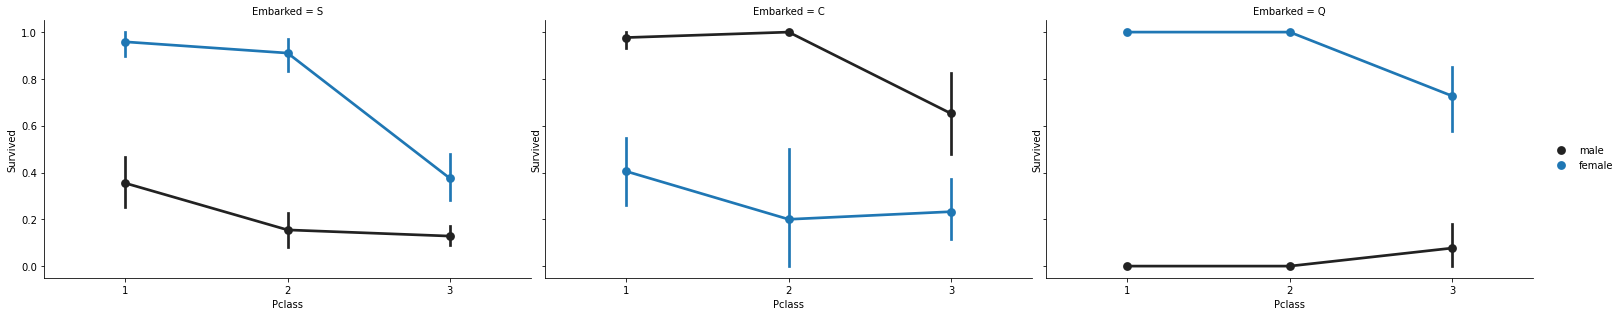

In [12]:
# Generating a grid for each of the values of Embarked (C, S, Q)
grid = sns.FacetGrid(train_df, col='Embarked', size=4.5, aspect=1.6)

# For each grid, generate a poinplot of Pclass x Survived divided in two sexes
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
for i in range(grid.axes.shape[1]):
    grid.axes[0,i].set_ylabel('Survived')

grid.add_legend()


# Data preprocessing

In [13]:
train_df, test_df = data_reload()
# Dropping PassengerId from train
train_df = train_df.drop(['PassengerId'], axis=1)

## 1. Treating missing data
As a reminder, we have to deal with Cabin (687 NaN), Embarked (2 NaN) and Age (177 NaN)

### 1.1 Cabin
A cabin number looks like ‘C123’ and the letter refers to the deck. We are going to map each cabin to a value and assign 0 to the 'Nan'

In [14]:
import re

data = [train_df, test_df]

# Separating the decks from the cabins
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()) # Assigns to dataset['Deck'] the searched character in dataset['Cabin']
    
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
train_df['Deck'].value_counts()


U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

### 1.2 Age:
We will add new ages based on the mean and standard deviation of the ages


In [15]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    
    # Count of how many null ages there are
    is_null = dataset["Age"].isnull().sum()

    # compute random numbers between the mean, std following a normal distribution
    rand_age = np.random.normal(mean, std**2, size = is_null)

    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

### 1.3 Embarked:
Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [16]:
train_df['Embarked'].value_counts(dropna=False, ascending = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [17]:

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
train_df["Embarked"].isnull().sum()


0

## 2. Converting features

Convert string features into numerical valid features

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


### 2.1: 'deck' feature

In [19]:
train_df['Deck'].value_counts(dropna=False, ascending = False)

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [20]:

deck_count = train_df['Deck'].value_counts(dropna=False, ascending = False).to_dict()
deck = deck_count.copy()

# Values that are less present than the threshold are set to zero
threshold = 5
for (i, key) in  enumerate( deck_count.keys() ):
    if deck_count[key] < threshold:
        deck[key] = 0
    else:
        deck[key] = i  #deck = {'U': 0, 'C': 1, 'B': 2, 'D': 3, 'E': 4, 'A': 5, 'F': 6, 'G': 0, 'T': 0}

print(deck)


{'U': 0, 'C': 1, 'B': 2, 'D': 3, 'E': 4, 'A': 5, 'F': 6, 'G': 0, 'T': 0}


In [21]:
data = [train_df, test_df]
for dataset in data:
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

train_df['Deck'].value_counts()

0    692
1     59
2     47
3     33
4     32
5     15
6     13
Name: Deck, dtype: int64

### 2.2: 'Embarked'

In [22]:
train_df['Embarked'].value_counts(dropna=False, ascending = False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    dataset['Embarked'] = dataset['Embarked'].fillna(0)
    dataset['Embarked'] = dataset['Embarked'].astype(int)

train_df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

### 2.3: 'Sex'

In [24]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    dataset['Sex'] = dataset['Sex'].fillna(0)
    dataset['Sex'] = dataset['Sex'].astype(int)

train_df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

### 2.4: Fare
Normalizing “Fare” from float64, using the “astype()” function pandas provides:

In [26]:
dataset['Fare'].value_counts(dropna=False,bins=4)

(-0.513, 128.082]     388
(128.082, 256.165]     21
(256.165, 384.247]      7
(384.247, 512.329]      1
Name: Fare, dtype: int64

In [27]:
mu = train_df['Fare'].mean()
sigma = train_df['Fare'].std()
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = (dataset['Fare'] - mu)/sigma
    dataset['Fare'] = dataset['Fare'].fillna(0)
    #dataset['Fare'] = dataset['Fare'].astype(int)

dataset['Fare'].value_counts(dropna=False,bins=4)

(-0.659, 1.929]    389
(1.929, 4.507]      21
(4.507, 7.084]       7
(7.084, 9.662]       1
Name: Fare, dtype: int64

### 2.5: Age
Normalizing the "Age" feature

In [28]:
dataset['Age'].value_counts(dropna=False,bins=4)

(-31.0, 203.5]                   363
(-265.5, -31.0]                   30
(203.5, 438.0]                    14
(-500.93899999999996, -265.5]     11
Name: Age, dtype: int64

In [29]:
mu = train_df['Age'].mean()
sigma = train_df['Age'].std()
data = [train_df, test_df]

for dataset in data:
    dataset['Age'] = (dataset['Age'] - mu)/sigma
    dataset['Age'] = dataset['Age'].fillna(0)
    #dataset['Age'] = dataset['Age'].astype(int)

dataset['Age'].value_counts(dropna=False,bins=4)

(-0.614, 1.875]     363
(-3.103, -0.614]     30
(1.875, 4.365]       14
(-5.604, -3.103]     11
Name: Age, dtype: int64

### 2.6: Name
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [30]:
data = [train_df, test_df]
titles = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare": 4}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df['Title'].value_counts(dropna=False, ascending=False)


Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [31]:
data = [train_df, test_df]

for dataset in data:
# convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

train_df['Title'].value_counts(dropna=False, ascending=False)

0    517
1    185
2    126
3     40
4     23
Name: Title, dtype: int64

### 2.7: Ticket

In [32]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

We are going to map the tickets into how many tickets are equal or not

In [33]:
data = [train_df, test_df]

for dataset in data:
    tickets = dataset['Ticket'].copy()
    tickets_series = tickets.value_counts(dropna=False)
    tickets_series[ tickets_series == 1 ] = 0
    tickets_dict = tickets_series.to_dict()
    dataset['ticket_per_person'] = dataset['Ticket'].map(tickets_dict)
    dataset['ticket_per_person'] = dataset['ticket_per_person'].astype(int)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

print(train_df['ticket_per_person'].describe())

count    891.000000
mean       1.173962
std        1.748847
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        7.000000
Name: ticket_per_person, dtype: float64


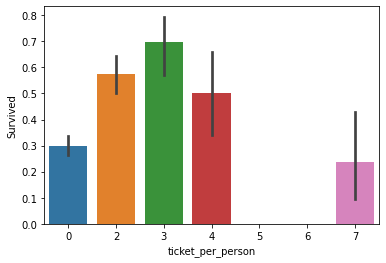

In [34]:
sns.barplot(x='ticket_per_person', y='Survived', data=train_df,)

## 2. New features

### 2.1 'relatives' and 'alone'
Number of relatives as a combination of SibSp and Parch

In [35]:
data = [train_df, test_df]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch'] # Relatives is the sum of wifes and children
    dataset.loc[dataset['relatives'] > 0, 'alone'] = 0 # not_alone = 1 if person has relatives on board
    dataset.loc[dataset['relatives'] == 0, 'alone'] = 1 # not_alone = 0 if person is alone
    dataset['alone'] = dataset['alone'].astype(int)

train_df['alone'].value_counts()

1    537
0    354
Name: alone, dtype: int64

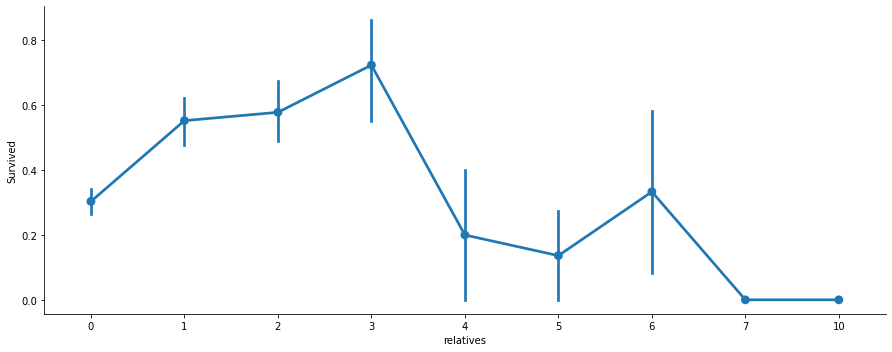

In [36]:

axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

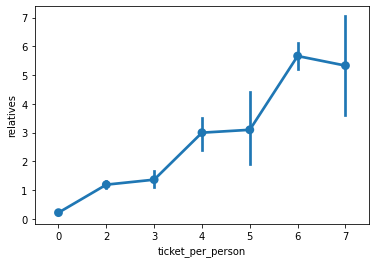

In [37]:
sns.pointplot('ticket_per_person','relatives', 
                      data=train_df, aspect = 2.5)

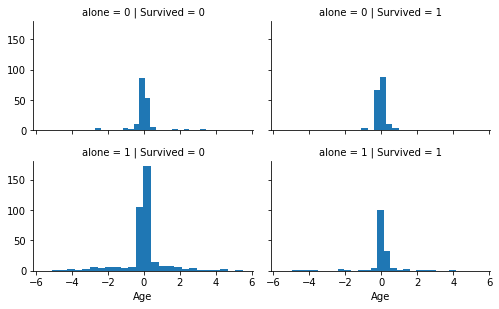

In [38]:
# Generating a Facegrid of all the combinations between Pclass and Survived
grid2 = sns.FacetGrid(train_df, col='Survived', row = 'alone', size=2.2, aspect=1.6)

# Plotting an conditional histogram 
grid2.map(plt.hist, 'Age', bins=25)

People who were alone had a higher probability of not Surviving. This increased if people alone were from 20 to 30 years old

### 2.3 Age * Class

In [39]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

### 2.4 Fare per Person

In [40]:
data = [train_df, test_df]
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)

# 3. Building Machine Learning Models

In [41]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,ticket_per_person,relatives,alone,Age_Class,Fare_Per_Person
0,0,3,0,-0.051267,1,0,-0.502163,0,0,0,0,1,0,-0.153801,-0.251082
1,1,1,1,0.118582,1,0,0.786404,1,1,2,0,1,0,0.118582,0.393202
2,1,3,1,-0.008805,0,0,-0.488580,0,0,1,0,0,1,-0.026414,-0.488580
3,1,1,1,0.086735,1,0,0.420494,0,1,2,2,1,0,0.086735,0.210247
4,0,3,0,0.086735,0,0,-0.486064,0,0,0,0,0,1,0.260206,-0.486064
5,0,3,0,1.519837,0,0,-0.477848,2,0,0,0,0,1,4.559510,-0.477848
6,0,1,0,0.288431,0,0,0.395591,0,4,0,0,0,1,0.288431,0.395591
7,0,3,0,-0.263578,3,1,-0.223957,0,0,3,4,4,0,-0.790734,-0.044791
8,1,3,1,0.001811,0,2,-0.424018,0,0,2,3,2,0,0.005433,-0.141339
9,1,2,1,-0.136191,1,0,-0.042931,1,0,2,2,1,0,-0.272383,-0.021466


In [42]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

### 3.1: Stochastic Gradient Descent (SGD)

In [43]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

### 3.2: Random Forest

In [44]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### 3.3: Logistic Regression

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

### 3.4: K-Nearest Neighbours

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 

Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### 3.5: Gaussian Naive Bayes

In [47]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### 3.6: Perceptron

In [48]:
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

### 3.7: Linear Support Vector Machine

In [49]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

### 3.8: Decision Tree

In [50]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# 4. Evaluating best Method

In [51]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.33,Random Forest
99.33,Decision Tree
87.54,KNN
80.02,Logistic Regression
79.91,Support Vector Machines
78.45,Naive Bayes
76.09,Stochastic Gradient Decent
74.75,Perceptron


# 5. Evaluating Random Forest on Cross-Validation

In [52]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.85393258 0.75280899 0.83146067 0.86516854 0.84269663
 0.80898876 0.75280899 0.86516854 0.83146067]
Mean: 0.8171161048689137
Standard Deviation: 0.04233371290008012


In [53]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.169
Age_Class,0.125
Age,0.121
Fare_Per_Person,0.120
Fare,0.117
Sex,0.113
Pclass,0.051
ticket_per_person,0.045
Deck,0.043


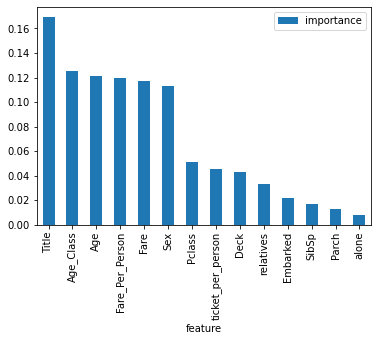

In [54]:
importances.plot.bar()

In [55]:
train_df  = train_df.drop("alone", axis=1)
test_df  = test_df.drop("alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [56]:
# Training the Random Forest Again
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [57]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Training score: ", round(acc_random_forest,2,), "%")
print("oob score: ", round(random_forest.oob_score_, 4)*100, "%")

Training score:  99.33 %
oob score:  82.04 %


# 6. Hyperparameters Tunning

In [58]:
# This cell takes a approximately 5 minutes to run
# print("# This cell takes a approximately 5 minutes to run")
# aram_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(X_train, Y_train)
# clf.best_params_

In [60]:
# Random Forest (results from the previous cell)
criterion = 'gini'
min_samples_leaf = 1
min_samples_split = 25
n_estimators = 100

random_forest = RandomForestClassifier(criterion = criterion, 
                                       min_samples_leaf = min_samples_leaf, 
                                       min_samples_split = min_samples_split,   
                                       n_estimators=n_estimators, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 3)

print("Training score: ", round(acc_random_forest,3,), "%")
print("oob score: ", round(random_forest.oob_score_, 2)*100, "%")

Training score:  88.552 %
oob score:  82.0 %


## Refine the Tunning using a random grid

In [61]:
from scipy.stats import randint
low = 0
high = 10
rv = randint(low, high)
print(rv)

In [67]:
# This cell takes a approximately 2 minutes to run
print("This cell takes a approximately 2 minutes to run")
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from scipy.stats import randint

rf2 = RandomForestClassifier(criterion = criterion, 
                                       min_samples_leaf = min_samples_leaf, 
                                       min_samples_split = min_samples_split,   
                                       n_estimators=n_estimators,
                                       oob_score = True,
                                       max_features='auto', 
                                       random_state=5, 
                                       n_jobs=-1)


distributions = dict(min_samples_leaf=randint(1,4),
                     min_samples_split = randint(20,30),
                     n_estimators = randint(70,200)
                     )
clf = RandomizedSearchCV(estimator = rf2,
                         param_distributions = distributions,
                         n_iter = 300,
                         scoring ='roc_auc_ovr_weighted',
                         cv = 3,
                         random_state=0,
                         return_train_score = True)
search = clf.fit(X_train, Y_train)
search.best_params_


This cell takes a approximately 2 minutes to run


{'min_samples_leaf': 2, 'min_samples_split': 25, 'n_estimators': 138}

In [68]:
criterion = 'gini'
min_samples_leaf = 2
min_samples_split = 25
n_estimators = 138

rf3 = RandomForestClassifier(criterion = criterion, 
                                       min_samples_leaf = min_samples_leaf, 
                                       min_samples_split = min_samples_split,   
                                       n_estimators=n_estimators,
                                       oob_score = True,
                                       max_features='auto', 
                                       random_state=0, 
                                       n_jobs=-1)
rf3.fit(X_train, Y_train)
Y_prediction = rf3.predict(X_test)

acc_random_forest = round(rf3.score(X_train, Y_train) * 100, 3)

print("Training score: ", acc_random_forest, "%")
print("oob score: ", rf3.oob_score_*100, "%")

Training score:  87.43 %
oob score:  83.38945005611671 %


# 7. Submission

In [69]:
subscription = pd.Series(Y_prediction, index=test_df['PassengerId'], name='Survived')

file_number = 11
file_name = ''.join(["Submission_", str(file_number), '.csv'])

subscription.to_csv(os.path.join('Submissions', file_name), header=True)

subscription.head(8)

PassengerId
892    0
893    0
894    0
895    0
896    1
897    0
898    1
899    0
Name: Survived, dtype: int64

# 8. Evaluation of the Model

In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rf3, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[495,  54],
       [ 90, 252]])

In [71]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8235294117647058
Recall: 0.7368421052631579


In [72]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7777777777777778

### Precision Recall Curves

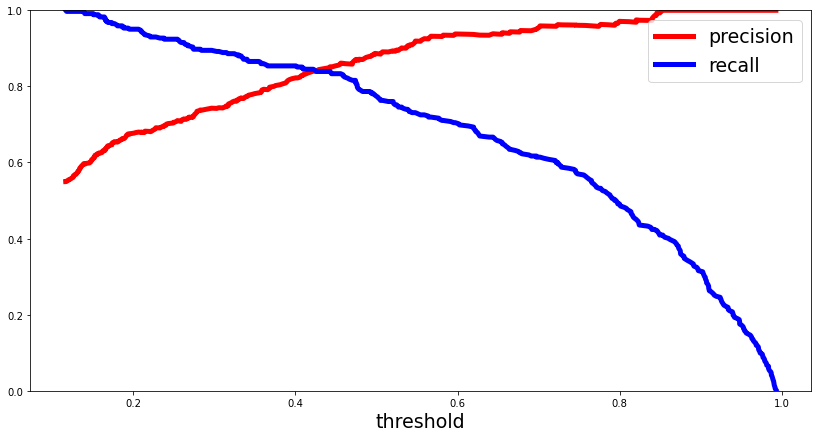

In [73]:
# Plotting the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rf3.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

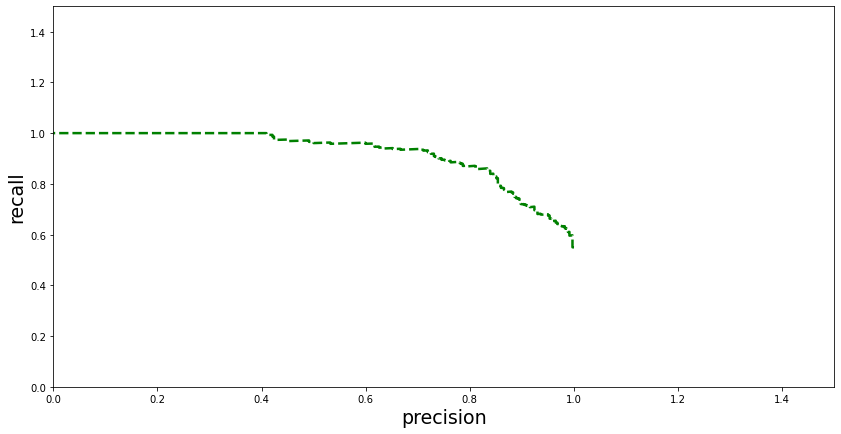

In [74]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

### ROC AUC Curve

In [76]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9472832049766189


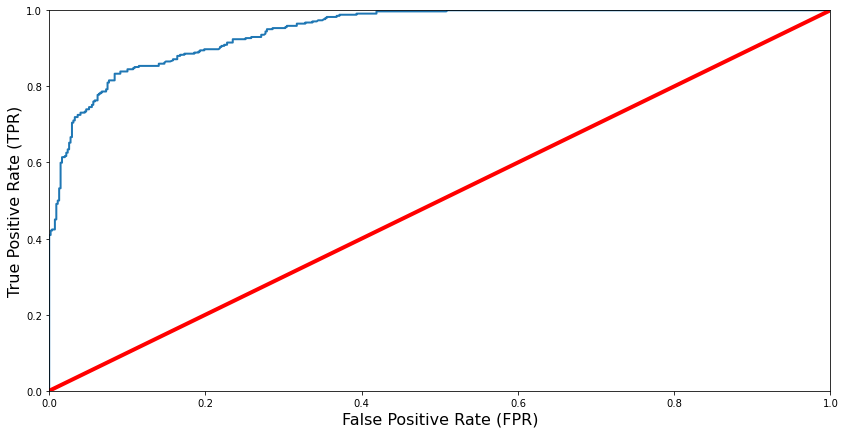

In [77]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()